In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,Estimated,Purchased,Unnamed: 5
0,15624510,Male,19,19000,0,NaN
1,15810944,Male,35,20000,0,NaN
2,15668575,Female,26,43000,0,NaN
3,15603246,Female,27,57000,0,NaN
4,15804002,Male,19,76000,0,NaN
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,NaN
396,15706071,Male,51,23000,1,NaN
397,15654296,Female,50,20000,1,NaN
398,15755018,Male,36,33000,0,NaN


In [3]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy')
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [9]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [11]:
cm

array([[63,  5],
       [ 2, 30]], dtype=int64)

C:\Users\rahul\AppData\Local\Temp\ipykernel_10052\3202433428.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)


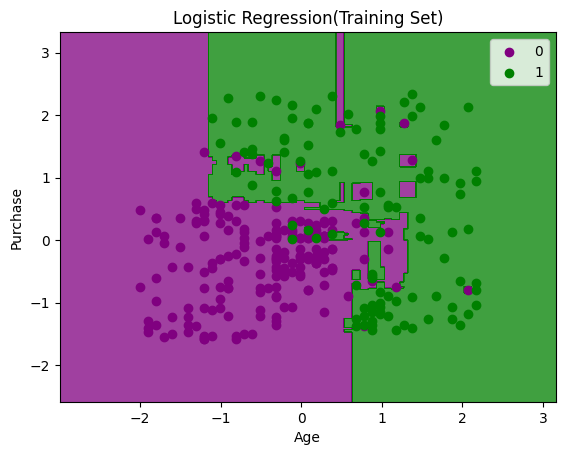

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('purple', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('purple', 'green'))(i), label = j)
    
plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.legend()
plt.show()